<a href="https://colab.research.google.com/github/JonasSouza871/Estudo_machine_learning/blob/main/1.Classica%C3%A7%C3%A3o_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O primeiro projeto

---------------------

- Dataset:

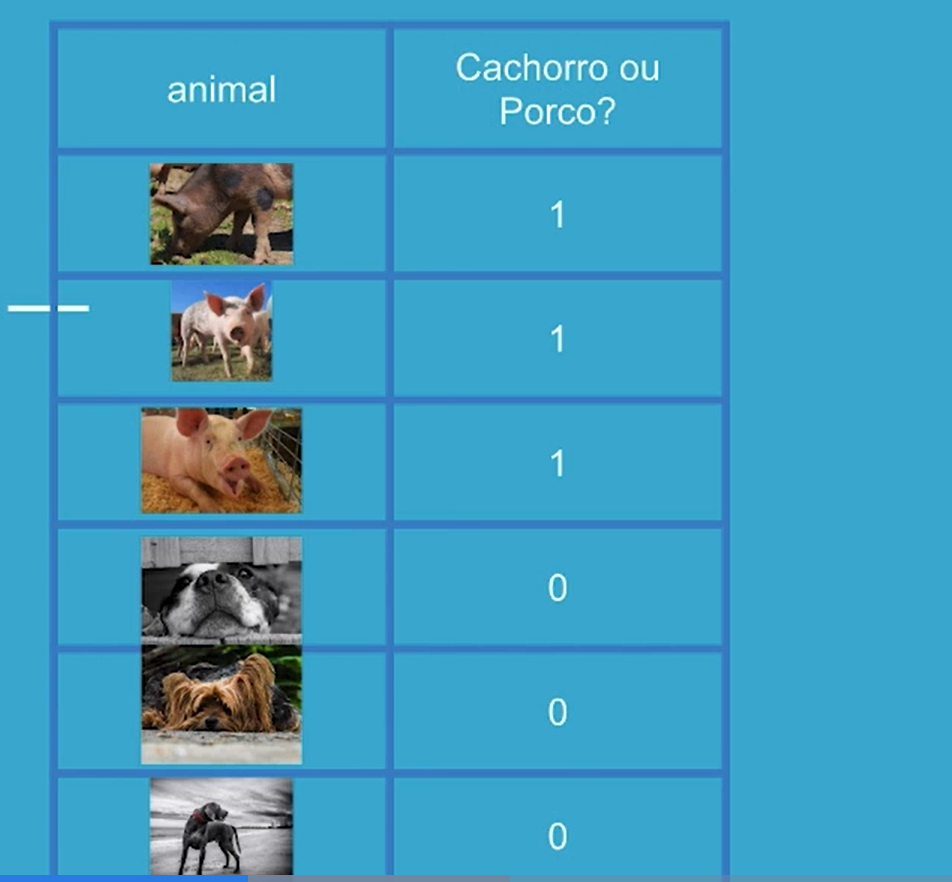

- Aprendizado supervisionado: Você ensina apartir de características dos animais, quanto mais informação melhor será o resultado.

- Features:

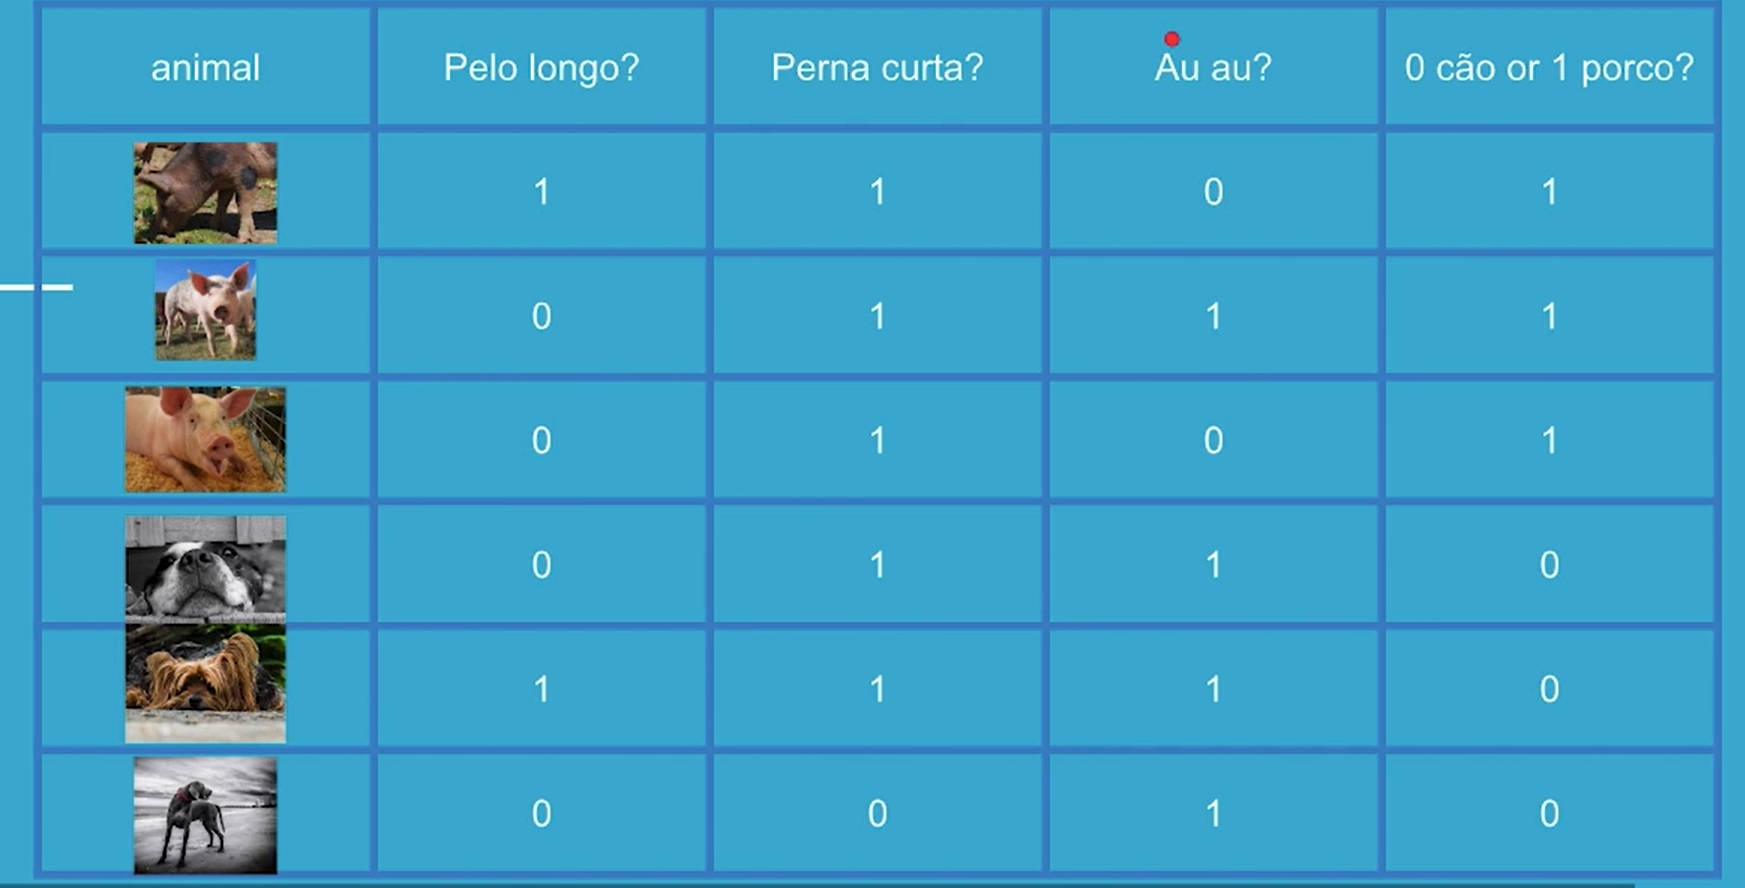

-  As 3 primeiras colunas são features (Características dos animais e a ultima é a de classificação) -> validação

In [144]:
#longo?
#perna curta?
# faz au au?

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
classes = [1,1,1,0,0,0] #classes a quais os dados pertencem
# 1 para porco e 0 para cachorro
# classes verdadeirasa

## Biblioteca scikit-learn

varios algoritmos de estimação

In [145]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados,classes) #Adaptar o modelo a uma informação
#como é um modelo supervisionado, além dos dados é necessário enviar as classes de cada animal também
#modelo foi treinado com as informaçoes.

LinearSVC()

In [146]:
animal_misterioso = [1,1,1] #Colocando as informaçoes de um animal que tem pelo longo, perna curta e faz au au.
model.predict([animal_misterioso]) #comando para o modelo prever qual animal é apartir do que ele foi treinado.
# o modelo chegou a conclusão que é um cachorro, está certo.


array([0])

-  Exemplo para varios animais misteriosos:

In [147]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste = [misterio1, misterio2, misterio3] #todos os animais misteriosos adicionados aq
model.predict(teste) #previu um cachorro, segundo porco, terceiro cachorro.

array([0, 1, 0])

- O que era na verdade:

In [148]:
[0,1,1] #Cachorro, porco,porco era o certo
#modelo teve 66,6% de acuracia.
previsto = model.predict(teste)
teste_real = [0,1,1]

In [149]:
previsto  == teste_real #Mesmo resultado qeu chegamos acima.

array([ True,  True, False])

In [150]:
valores_corretos = (previsto == teste_real).sum() #como 1 será de analises verdadeiras e 0 de falso, é so somar para encontrarmos a quantidade de verdadeiros
total = len(teste_real) #quantidade de termos no teste será o total
print(valores_corretos,total)
taxa_acerto = (valores_corretos/total)*100
print(taxa_acerto)

2 3
66.66666666666666


Parametros do acurracy score:

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)


In [151]:
from sklearn.metrics import accuracy_score #Fazendo o calculo acima importanto a biblioteca
accuracy_score(teste_real, previsto, normalize = True, sample_weight =None) #real, previsto, e com a normalização ativa (valores entre 0 e1)

0.6666666666666666

- Mudando nomes das variaveis para padronizar o projeto.

In [152]:
treino_x = dados #os dados de treino
treino_y = classes #A classes de validação
teste_x = teste #Dados de teste
teste_y = teste_real #Validação dos dados de teste

# Testes Replicáveis, estraficação e lendo dados da Internet


--------------

In [153]:
import pandas as pd

In [154]:
Link_dados = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
pd.read_csv(Link_dados) #Leitura dos dados do link que iremos trabalhar, dados disponíveis no github.

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [155]:
dados_gerais = pd.read_csv(Link_dados)

## O que temos nos dados:


- Temos 3 colunas com paginas diferentes dentro de um site: pagina home, how_it_works e contact.
- Tem também a ultima coluna que é para saber se o usuário comprou ou não o produto.
- 1 para se o usuário clicou e 0 se o usuário não clicou.

## Objetivo do projeto:
- o objetivo desse projeto vai ter que treinar o modelo com base nas features de cliques do usuário para prever se o usario é um potencial comprador ou não.
- O treino sera o dado de clique e a validação o de compra.

In [156]:
x = dados_gerais[["home", "how_it_works","contact"]] #Salva somente as colunas de treino (Clique).
print(x)

    home  how_it_works  contact
0      1             1        0
1      1             1        0
2      1             1        0
3      1             1        0
4      1             1        0
..   ...           ...      ...
94     0             0        1
95     1             1        1
96     0             0        1
97     0             1        0
98     0             0        0

[99 rows x 3 columns]


In [157]:
y = dados_gerais[["bought"]]
print(y)

    bought
0        0
1        0
2        0
3        0
4        0
..     ...
94       0
95       1
96       0
97       0
98       0

[99 rows x 1 columns]


## Treino

 - Sempre que a gente tem um conjunto de dados a gente tem que separar o conjunto de treino e testes para o modelo não se enviezar.
 - Uma boa técnica é treinar com 75% dos dados e testar com os 25% não utilizados.

In [158]:
dados_gerais.shape #quantidade de dados que temos, como podemos ver temos 99 dados (0 a 99)
# iremos utilizar 75 para treino (0 a 74)
# 25 para teste (74 a 99)

(99, 4)

In [159]:
treino_x = x[:75] #Os dados de treino serão os 75 primeiros dados
treino_y = y[:75] #Os 75 primeiros dados da coluna bought (validação)
treino_x.shape

(75, 3)

In [160]:
teste_x = x[75:] #Os 24 ultimos dados como sendo de teste
teste_y = y[75:] # Os ultimo 24 dados da coluna bought como sendo a verficação do teste
teste_x.shape

(24, 3)

In [161]:
model.fit(treino_x,treino_y) #Com base nos 75 dados de treino falado acima.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [162]:
import numpy as np

In [163]:
previsoes_modelo = model.predict(teste_x) #Previsao nos dados de teste
print(previsoes_modelo.shape) #Previsoes feitas apartir do treinamento nos dados de teste
print(previsoes_modelo)

(24,)
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [164]:
teste_y.shape

(24, 1)

- Problema:  Vemo que temos um problema ao utilizar os dados de previsoes_modelo e teste_y por conta de serem de modelo de array diferentes.
- para resolver isso iremos utilizar o parametros values.ravel() que converte um array multimensional em um Array 1D conforme o previsoes_modelo é

In [165]:
teste_y = teste_y.values.ravel() #conversao de array multimensional para 1D
print(teste_y)

[0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [166]:
Acertos_modelo = (previsoes_modelo == teste_y).sum()
print(Acertos_modelo) #O modelo acertou em 23 casos do teste (24 no total)
Total = len(teste_y)
print(Total)

23
24


In [167]:
Acurracia_modelo = Acertos_modelo/Total
print(Acurracia_modelo*100) #Acerto do modelo foi de 95,83% de acerto.

95.83333333333334


- Utilizando a biblioteca:

In [168]:
Acurracia_biblioteca = accuracy_score(teste_y, previsoes_modelo,normalize= True, sample_weight= None) #Primeiro o que é verdadeiro e depois o que é previsto
print(Acurracia_biblioteca*100)

95.83333333333334


-  Vemos que os valores bateram.

# Usando a biblioteca para separar treino e teste

----------------

In [169]:
from sklearn.model_selection import train_test_split

train_test_split(x,y) # O proprio modelo ja separar aleatoriamente entre teste e treino com uma separação de 75% para treino e 25% para teste
#veja que sao geradas 4 tabelas, treino_x, teste_x, treino_y, teste_y.

[    home  how_it_works  contact
 6      1             1        0
 77     0             1        0
 91     1             1        0
 50     1             1        0
 19     0             1        0
 ..   ...           ...      ...
 86     1             1        0
 28     0             1        0
 46     1             0        1
 26     1             1        1
 79     1             1        0
 
 [74 rows x 3 columns],
     home  how_it_works  contact
 76     0             0        1
 57     1             1        0
 92     1             1        0
 2      1             1        0
 82     0             0        1
 58     1             0        1
 68     1             0        1
 24     1             0        1
 5      1             0        1
 35     1             0        1
 60     1             0        1
 78     0             0        1
 84     1             0        1
 65     0             1        1
 93     0             0        1
 43     1             0        1
 74     0        

In [170]:
# para salvar nas variaveis:
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y)
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
10     1             1        0
40     0             1        0
63     0             1        0
30     0             1        0
54     1             0        1
93     0             0        1
66     0             0        1
74     0             0        1
71     0             0        1
98     0             0        0
83     1             0        1
4      1             1        0
29     0             0        1
57     1             1        0
67     1             0        1
59     0             0        1
68     1             0        1
47     1             0        1
44     0             0        1
77     0             1        0
35     1             0        1
75     0             1        0
12     0             0        1
80     0             0        1
28     0             1        0
96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 - Note que temos um problema aqui: O modelo fica variando sua acuracia toda hora a cada atualização, isso acontece que a função 'train_test_split(x,y)' está eparando aleatoriamente os dados de treino e teste, e a cada vez que a gente roda o codigo dnv ele gera uma separação com os dados em locais diferente, isso faz com que nunca seja a mesma ordem.

 - Para resolver isso utilizaremos uma random_state para que tenha uma reprodutibilidade do exeperimmento, para isso utilizaremos, uma SEED que vai garantir uma mesma aleatorização sempre.

In [171]:
SEED = 42
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED) #atraves do parametro random_state
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
62     0             0        1
40     0             1        0
95     1             1        1
18     0             0        1
97     0             1        0
84     1             0        1
64     1             0        1
42     0             1        0
10     1             1        0
0      1             1        0
31     1             0        1
76     0             0        1
47     1             0        1
26     1             1        1
44     0             0        1
4      1             1        0
22     0             0        1
12     0             0        1
88     0             0        1
73     0             0        1
49     1             1        0
70     1             1        0
68     1             0        1
15     0             0        1
39     1             0        1
96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Outro problema é a questao de garantir que na aleatoriedade se mantenha uma proporção entre o numero de elementos.
- Para resolver isso usa-se o paramentro stratify com o valor de qual variavel terá que ser proporcional.

In [172]:
SEED = 42
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED,stratify= y) #atraves do parametro random_state e mantendendo a proporção através do stratify
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)
print(acuracia*100)

    home  how_it_works  contact
78     0             0        1
10     1             1        0
12     0             0        1
87     0             0        1
80     0             0        1
62     0             0        1
69     1             1        0
24     1             0        1
37     0             0        1
19     0             1        0
26     1             1        1
32     0             0        1
36     1             0        1
47     1             0        1
55     1             1        0
23     0             1        0
92     1             1        0
7      1             0        1
81     0             0        1
15     0             0        1
61     0             1        0
89     1             0        1
46     1             0        1
29     0             0        1
85     1             1        0
96.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Se quisermos alterar a proporção de teste para treino, por exemplo fazer com que se tenha 80% dos dados de treino e 20% em teste podemos usar o paramentro test_size=0.2.

In [173]:
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y,test_size=0.2,random_state=SEED,stratify= y) #atraves do parametro random_state e mantendendo a proporção através do stratify

# Projeto de baixa dimensionalidade e o baseline

- Novo dataset

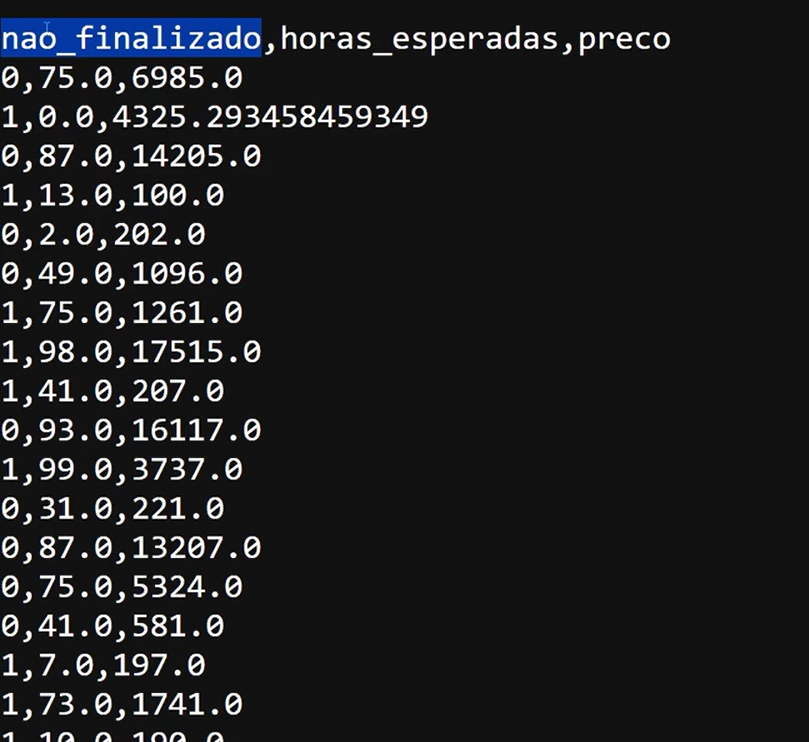

- Projeto com a primeira coluna com valores de 1 e 0 para definir se o projeto foi ou não finalizado.
- A segunda coluna tem a quantidade de horas esperadas para o projeto.
- A terceira coluna tem o preço esperado para o projeto.

In [174]:
Url_projeto = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

In [175]:
import pandas as pd

dados_projeto = pd.read_csv(Url_projeto)
dados_projeto.head(5)

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


- A primeira coluna é meio complicada de se ligar pois ela funciona como uma negativa, o que as vezes é dificil de entender.
- para isso vamos fazer uma modificaçao para ficar "finalizado" e 1 para sim e 0 para nao

In [176]:
dados_projeto["finalizado"]  = dados_projeto["nao_finalizado"].map({1:0, 0:1})  #Cria uma nova feature (coluna) com a lógica do finalizado
dados_projeto.head(5)

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


- Primeiro passo do projeto: verificar como preco se horas e relacionam.


<Axes: xlabel='horas_esperadas', ylabel='preco'>

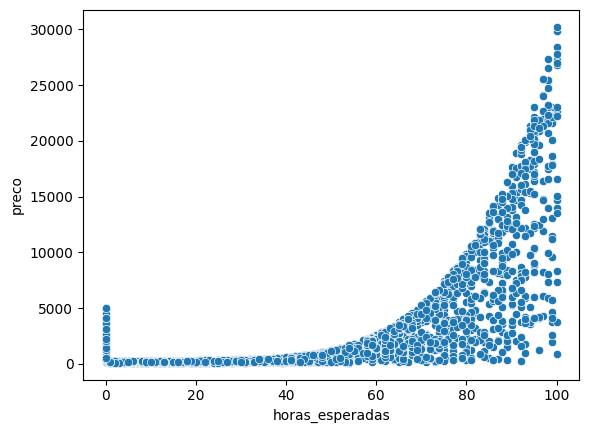

In [177]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados_projeto) #Plota no eixo x as horas_esperadas e no eixo y o preco

- A curva mostra que apartir do aumento das horas tem-se o aumento também do preço. O que faz sentido.

- Proximo passo: visualizar quais pessoas tiveram seus projetos finalizados, apartir do grafico, para isso vamos colocar outra cor para os projetos finalizados.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

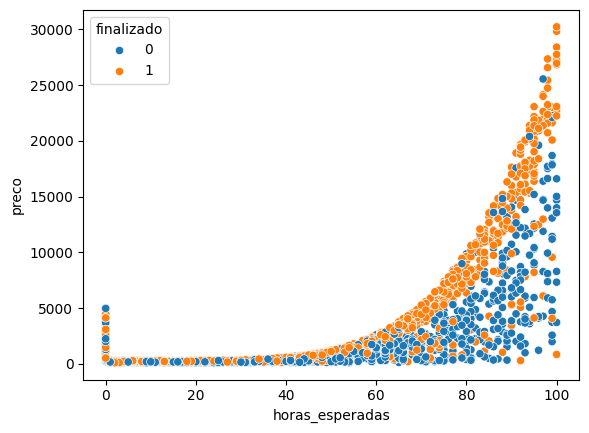

In [178]:
sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados_projeto, hue ="finalizado") #parametro hue utilizado para colorir os dados quando finalizado

- Projetos mais caros tendem a ser finalizados.

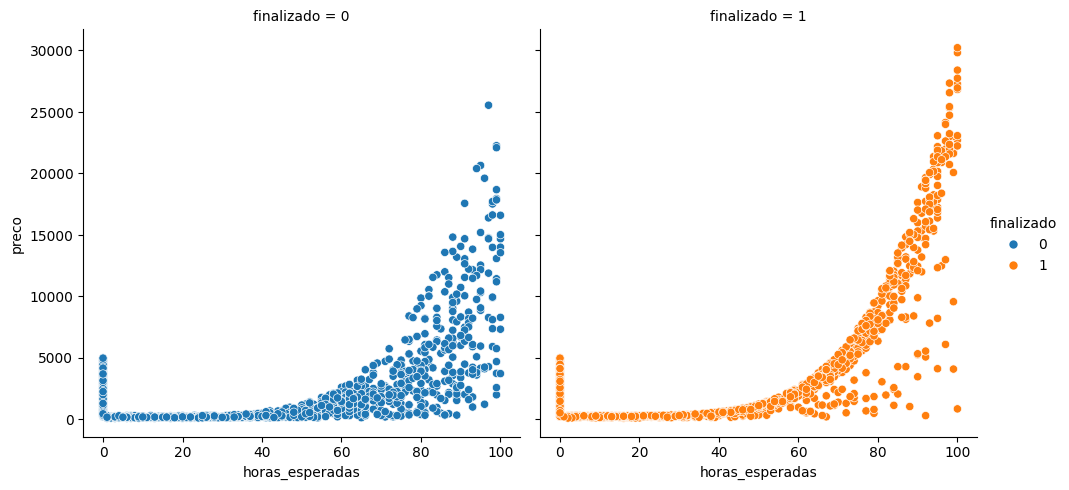

In [179]:
sns.relplot(x = "horas_esperadas", y = "preco", data = dados_projeto, hue ="finalizado", col= "finalizado")  #o comando relplot separa o grafico em dois apartir de uma coluna especifica
# nesse caso escolhemos a para ser separado com base na coluna "finalizado"
#temos que a curva do finalizados pagam bem mais e seguem uma curva exponencial

- Essas curvas nos mostram o ponto deal para o preço de determinado produto apartir de horas
- Ajuda a precificar o trabalho

-  Temos um problema no começo por que é mostrado apenas dados com apenas o preço, sem a quantidade de horas prevista, o que é um problema no geral.
- Para resolver isso, deve ser feita uma limpeza nesses dados, para que eles nao contem.
- Ou seja, jogar foram o que é igual a 0

In [180]:
dados_projeto = dados_projeto.query("horas_esperadas > 0 ") #Filtra para mostrar apenas os dados maior que 0
dados_projeto.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


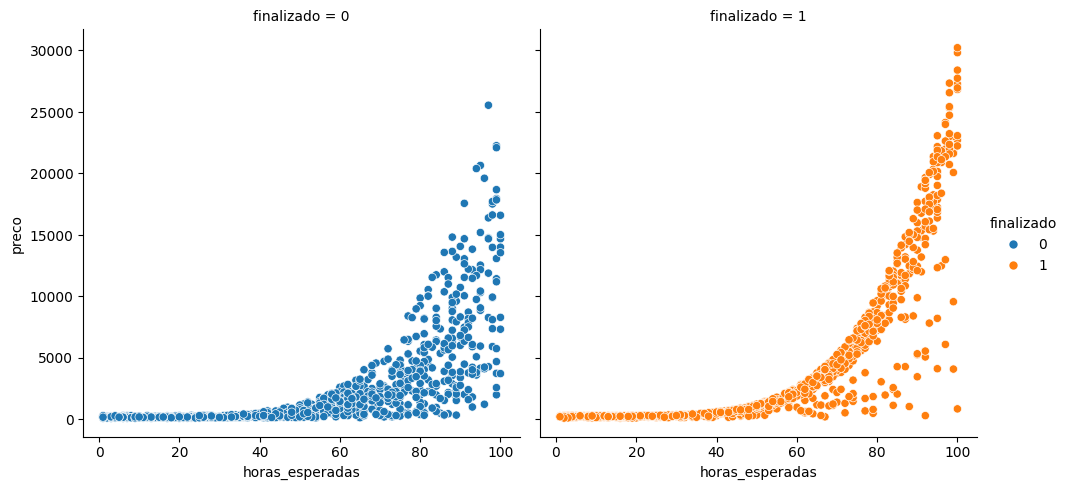

In [181]:
sns.relplot(x = "horas_esperadas", y = "preco", data = dados_projeto, hue ="finalizado", col= "finalizado")

- Limpeza concluida com sucesso.  Proximo passo será realizar o treinamento do modelo.

## Treinamento do modelo

In [182]:
x = dados_projeto[['horas_esperadas', 'preco']] #variaveis para treino
y = dados_projeto['finalizado'] #variavel para validação

In [183]:
SEED = 20
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED,test_size = 0.25, stratify= y) #Separação dos dados em dados de treino e dados de teste
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x) #Previsao do modelo com os dados de texto
total = len(teste_y)
valores_acertos = (teste_y == previsao).sum() #verifica enquanto casos o modelo teve valor igual do teste para previsao
acuracia = valores_acertos/total #calculo da acuracia do modelo
print(acuracia*100)
print(len(treino_x)) #quantidade de dados usados no treinamento
print(len(teste_x)) #quantidade de dados utilizados no teste

      horas_esperadas    preco
996              85.0    498.0
609              75.0   5743.0
313              54.0    900.0
2273             93.0   8221.0
1989              4.0    275.0
...               ...      ...
50               95.0  16377.0
988              92.0  17725.0
574             100.0  16594.0
762              57.0   1957.0
235              32.0    397.0

[540 rows x 2 columns]
60.55555555555555
1617
540


- O modelo treinado acerta em 60% dos casos se o projeto será ou não finalizado apartir dos dados

# Curva de decisão

---------------------


- Problema : baixa acuracia
- Plotar a curva do modelo treinado acima acima do grafico geral que fizemos no projeto anterior.

In [184]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

print(x_min, x_max, y_min, y_max) #valores minimos e maximos para horas esperadas (eixo x)
# valores minimo e maximo para preco (eixo y)

1.0 100.0 102.0 30223.0


In [185]:
import numpy as np

pixels = 100 #quantidade de pontos entre x min e x max
espacamento_entre_pontos = (x_max - x_min)/ pixels
print(espacamento_entre_pontos) #A cada 0.99 teremos um ponto....
print(np.arange(x_min, x_max, espacamento_entre_pontos ))
eixo_x = np.arange(x_min, x_max, espacamento_entre_pontos )

0.99
[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]


- Para o eixo Y:

In [186]:
import numpy as np

pixels = 100 #quantidade de pontos entre y min e y max
espacamento_entre_pontos = (y_max - y_min)/ pixels #distancia entre cada ponto
print(espacamento_entre_pontos) #A distancia calculada para ter 100 pontos foi de 301
print(np.arange(y_min, y_max, espacamento_entre_pontos )) #Np.arange(começo, fim, espaço)
eixo_y = np.arange(y_min, y_max, espacamento_entre_pontos ) #Np.arange(começo, fim, espaço)

301.21
[  102.     403.21   704.42  1005.63  1306.84  1608.05  1909.26  2210.47
  2511.68  2812.89  3114.1   3415.31  3716.52  4017.73  4318.94  4620.15
  4921.36  5222.57  5523.78  5824.99  6126.2   6427.41  6728.62  7029.83
  7331.04  7632.25  7933.46  8234.67  8535.88  8837.09  9138.3   9439.51
  9740.72 10041.93 10343.14 10644.35 10945.56 11246.77 11547.98 11849.19
 12150.4  12451.61 12752.82 13054.03 13355.24 13656.45 13957.66 14258.87
 14560.08 14861.29 15162.5  15463.71 15764.92 16066.13 16367.34 16668.55
 16969.76 17270.97 17572.18 17873.39 18174.6  18475.81 18777.02 19078.23
 19379.44 19680.65 19981.86 20283.07 20584.28 20885.49 21186.7  21487.91
 21789.12 22090.33 22391.54 22692.75 22993.96 23295.17 23596.38 23897.59
 24198.8  24500.01 24801.22 25102.43 25403.64 25704.85 26006.06 26307.27
 26608.48 26909.69 27210.9  27512.11 27813.32 28114.53 28415.74 28716.95
 29018.16 29319.37 29620.58 29921.79]


 - Proximo passo é fazer o cruzamento entre os dois eixos, fazer a combinação para gerar a curva.

In [187]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
xx #eixo x repetido 100 vezes e eixo y repetido 100 vezes

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

- Cruzamento dos dados:

In [188]:
xx.ravel() #converte em um array unimedemsional
yy.ravel() #converte em um array unimedemsional

array([  102.  ,   102.  ,   102.  , ..., 29921.79, 29921.79, 29921.79])

In [189]:
np.c_[xx.ravel(),yy.ravel()] #combina os dois arrays agora unmencionais
#como podemos ver, agora temos pontos, exemplo: 1 no eixo x e 102 no eixo y
# 1.99 no eixo x 102 no eixo y

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [190]:
pontos = np.c_[xx.ravel(),yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)
z #predição para os valores acima

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

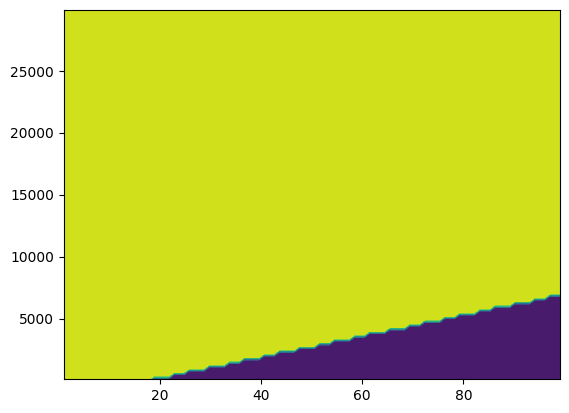

In [191]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z)



- agora vemos quem vai ser finalidao

<Axes: xlabel='horas_esperadas', ylabel='preco'>

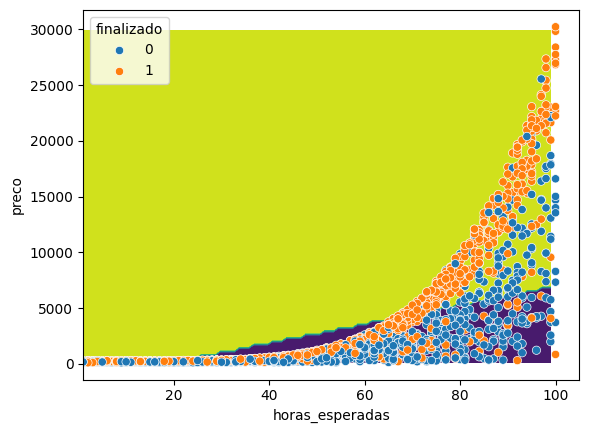

In [192]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z)
sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados_projeto, hue ="finalizado") #parametro hue utilizado para colorir os dados quando finalizado


 - Função onde as funçoes passa de jogar o valor de 0 para 1, curva que deveria ser para separar 1e 0.
 - Como vemos ele foi horrivel. nçao conseguiu separar bem na análise, isso porque o modelo que estamos trabalhando é linear, e o comportamento do grafico de parece mais uma exponencial para separar os dados.
 - sendo assim podemos afirmar que essa curva não conseguiu separar bem os pontos de não finalizado e finalizado.

- Resumo dos proximos passos: basicamente, a gente precisava encontrar um modelo de curva que representasse bem no grafico onde de fato é um ponto ideal de preço e horas_esperadas que tem maior probablidade de serem fnalizados.

# Estimadores não lineares e Support Vector Machine


----------------------------------------------------

- Importantando o support Vector Machine que não necessariamente é linear

In [193]:
from sklearn.svm import SVC

In [194]:
model = SVC()

In [195]:
SEED = 20
treino_x,teste_x,treino_y, teste_y = train_test_split(x,y, random_state=SEED,test_size = 0.25, stratify= y) #Separação dos dados em dados de treino e dados de teste
print(teste_x)
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x) #Previsao do modelo com os dados de texto
total = len(teste_y)
valores_acertos = (teste_y == previsao).sum() #verifica enquanto casos o modelo teve valor igual do teste para previsao
acuracia = valores_acertos/total #calculo da acuracia do modelo
print(acuracia*100)

      horas_esperadas    preco
996              85.0    498.0
609              75.0   5743.0
313              54.0    900.0
2273             93.0   8221.0
1989              4.0    275.0
...               ...      ...
50               95.0  16377.0
988              92.0  17725.0
574             100.0  16594.0
762              57.0   1957.0
235              32.0    397.0

[540 rows x 2 columns]
56.666666666666664


- Vemos que com o SVC, a acuracia piorou.
- Não necessariamente teria que melhorar.
- o SVC serve para que o modelo consiga fazer detecção não necessariamente tenha uma boa acuracia.

- Vendo a nova curva:

In [196]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

pixels = 100 #quantidade de pontos entre y min e y max
espacamento_entre_pontos = (y_max - y_min)/ pixels #distancia entre cada ponto
print(espacamento_entre_pontos) #A distancia calculada para ter 100 pontos foi de 301
print(np.arange(y_min, y_max, espacamento_entre_pontos )) #Np.arange(começo, fim, espaço)
eixo_y = np.arange(y_min, y_max, espacamento_entre_pontos ) #Np.arange(começo, fim, espaço)
xx, yy = np.meshgrid(eixo_x,eixo_y)
np.c_[xx.ravel(),yy.ravel()] #combina os dois arrays agora unmencionais
#como podemos ver, agora temos pontos, exemplo: 1 no eixo x e 102 no eixo y
# 1.99 no eixo x 102 no eixo y
pontos = np.c_[xx.ravel(),yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)

301.21
[  102.     403.21   704.42  1005.63  1306.84  1608.05  1909.26  2210.47
  2511.68  2812.89  3114.1   3415.31  3716.52  4017.73  4318.94  4620.15
  4921.36  5222.57  5523.78  5824.99  6126.2   6427.41  6728.62  7029.83
  7331.04  7632.25  7933.46  8234.67  8535.88  8837.09  9138.3   9439.51
  9740.72 10041.93 10343.14 10644.35 10945.56 11246.77 11547.98 11849.19
 12150.4  12451.61 12752.82 13054.03 13355.24 13656.45 13957.66 14258.87
 14560.08 14861.29 15162.5  15463.71 15764.92 16066.13 16367.34 16668.55
 16969.76 17270.97 17572.18 17873.39 18174.6  18475.81 18777.02 19078.23
 19379.44 19680.65 19981.86 20283.07 20584.28 20885.49 21186.7  21487.91
 21789.12 22090.33 22391.54 22692.75 22993.96 23295.17 23596.38 23897.59
 24198.8  24500.01 24801.22 25102.43 25403.64 25704.85 26006.06 26307.27
 26608.48 26909.69 27210.9  27512.11 27813.32 28114.53 28415.74 28716.95
 29018.16 29319.37 29620.58 29921.79]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: xlabel='horas_esperadas', ylabel='preco'>

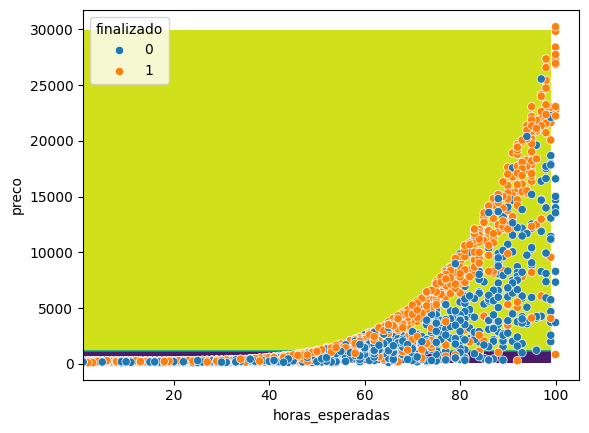

In [197]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z)
sns.scatterplot(x = "horas_esperadas", y = "preco", data = dados_projeto, hue ="finalizado") #parametro hue utilizado para colorir os dados quando finalizado

- Não deu muito certo...
- O princiapal problema aq é a escala, onde pode dar pesos diferentes.

In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)
model = SVC(gamma='auto')
model.fit(treino_x,treino_y) #realiza o treinamento
previsao = model.predict(teste_x) #Previsao do modelo com os dados de texto
total = len(teste_y)
valores_acertos = (teste_y == previsao).sum() #verifica enquanto casos o modelo teve valor igual do teste para previsao
acuracia = valores_acertos/total #calculo da acuracia do modelo
print(acuracia*100)

68.51851851851852


- Temos a maior acuracia até agora, graça aos dados em escala correta.

In [199]:
teste_x #como as colunas estao.

array([[ 1.21903398, -0.51627687],
       [ 0.868926  ,  0.53984011],
       [ 0.13369924, -0.4353314 ],
       ...,
       [ 1.74419595,  2.72476393],
       [ 0.23873164, -0.22249714],
       [-0.63653831, -0.53661392]])

In [202]:
data_col1= teste_x[:,0]
data_col2= teste_x[:,1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

pixels = 100 #quantidade de pontos entre y min e y max
espacamento_entre_pontos = (y_max - y_min)/ pixels #distancia entre cada ponto
print(espacamento_entre_pontos) #A distancia calculada para ter 100 pontos foi de 301
print(np.arange(y_min, y_max, espacamento_entre_pontos )) #Np.arange(começo, fim, espaço)
eixo_x = np.arange(x_min, x_max, espacamento_entre_pontos )
eixo_y = np.arange(y_min, y_max, espacamento_entre_pontos ) #Np.arange(começo, fim, espaço)
xx, yy = np.meshgrid(eixo_x,eixo_y)
np.c_[xx.ravel(),yy.ravel()] #combina os dois arrays agora unmencionais
#como podemos ver, agora temos pontos, exemplo: 1 no eixo x e 102 no eixo y
# 1.99 no eixo x 102 no eixo y
pontos = np.c_[xx.ravel(),yy.ravel()]
z = model.predict(pontos)
z = z.reshape(xx.shape)

0.060650714570834915
[-0.59601421 -0.53536349 -0.47471278 -0.41406207 -0.35341135 -0.29276064
 -0.23210992 -0.17145921 -0.11080849 -0.05015778  0.01049294  0.07114365
  0.13179437  0.19244508  0.25309579  0.31374651  0.37439722  0.43504794
  0.49569865  0.55634937  0.61700008  0.6776508   0.73830151  0.79895223
  0.85960294  0.92025365  0.98090437  1.04155508  1.1022058   1.16285651
  1.22350723  1.28415794  1.34480866  1.40545937  1.46611009  1.5267608
  1.58741152  1.64806223  1.70871294  1.76936366  1.83001437  1.89066509
  1.9513158   2.01196652  2.07261723  2.13326795  2.19391866  2.25456938
  2.31522009  2.3758708   2.43652152  2.49717223  2.55782295  2.61847366
  2.67912438  2.73977509  2.80042581  2.86107652  2.92172724  2.98237795
  3.04302866  3.10367938  3.16433009  3.22498081  3.28563152  3.34628224
  3.40693295  3.46758367  3.52823438  3.5888851   3.64953581  3.71018653
  3.77083724  3.83148795  3.89213867  3.95278938  4.0134401   4.07409081
  4.13474153  4.19539224  4.256

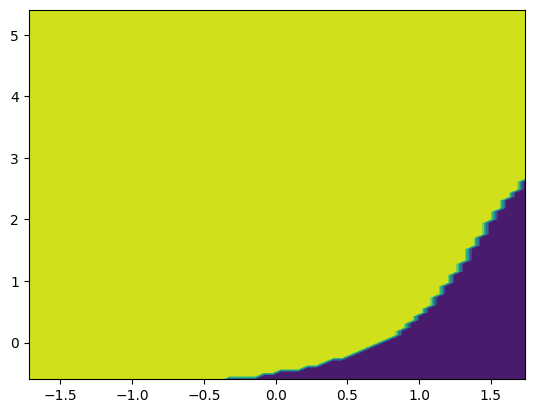

In [205]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z)
